In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [7]:
df=pd.read_csv('Mall_Customers (3).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.drop(columns=['CustomerID',"Gender"],inplace=True)


In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step-4: EDA

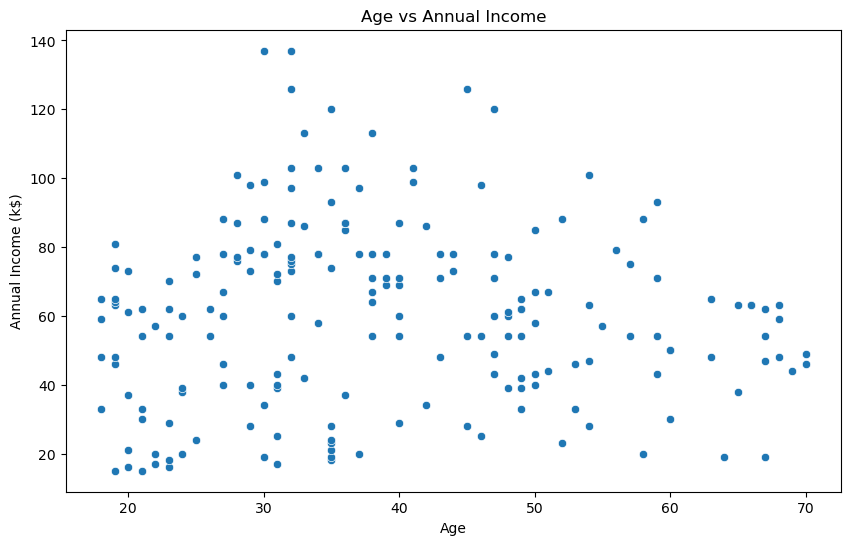

In [13]:
# display age and annual income with scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual Income')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

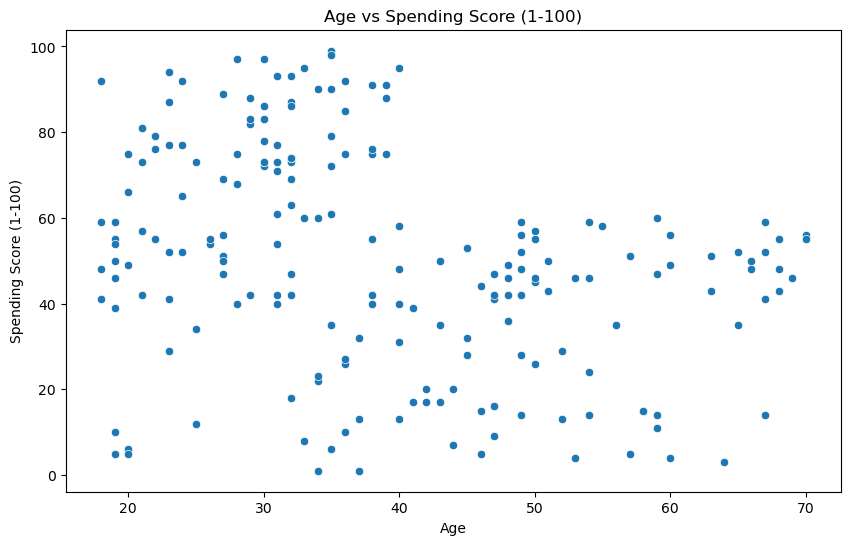

In [15]:
# display age and Spending scores with scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Spending Score (1-100)')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Step 5: Feature Engineering 

In [16]:
def ske_nm(sk):
    if sk>0:
        return "Right Skewed"
    elif sk<0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:",ske_nm(df["Age"].skew()))
print("Skewness of Annual Income (k$):",ske_nm(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score (1-100):",ske_nm(df["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income (k$): Right Skewed
Skewness of Spending Score (1-100): Left Skewed


In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

sc_data=scaler.fit_transform(df)
df=pd.DataFrame(sc_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Step 6:Train K-Mean Model


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
df.head()



c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

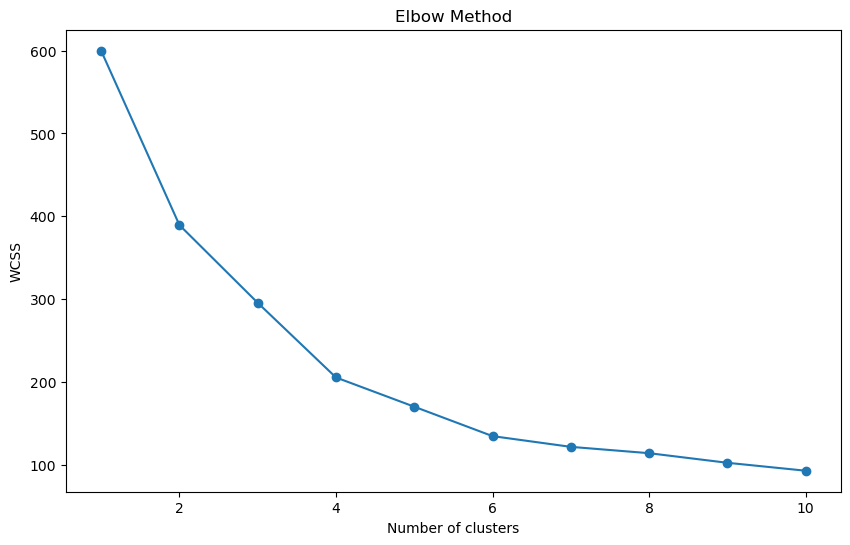

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop('Cluster', axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

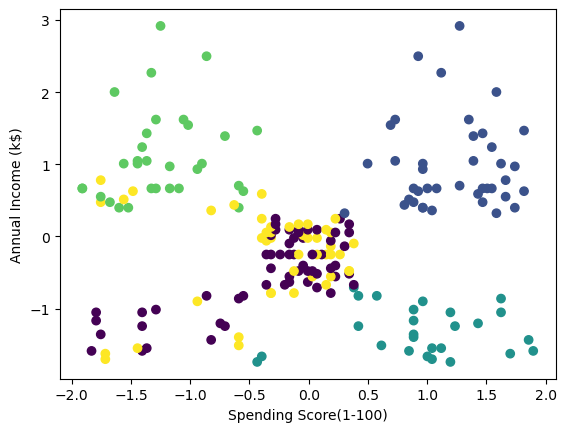

In [23]:
# display clusters
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"],c=df["Cluster"])
plt.xlabel("Spending Score(1-100)")
plt.ylabel("Annual Income (k$)") 


In [24]:
df.to_csv("Clustered_Mall_Customers.csv",index=False)

In [25]:
df=pd.read_csv("Clustered_Mall_Customers.csv")
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(columns=["Cluster"])
y=df['Cluster']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,y_pred))


Accuracy: 0.95


In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(columns=["Cluster"])
y=df['Cluster']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.975
